# Basics

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import librosa as l
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load Audio Files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename='/content/drive/MyDrive/Technology/Projects/ML/Theta/audioData/sound1.mp4'

In [19]:
ipd.Audio(filename)

# Extract Data & Sample Rate

In [51]:
# audio_data will have the amplitude
# sr = sample rate 
# lbrosa.load will load the file as floating point time-series
# sr=None to preseve native sampling rate

audio_data, sr = librosa.load(filename, sr=50000)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [52]:
print("length of the audio as np array -> ", (audio_data.shape))
print("sample rate is -> ", sr)

length of the audio as np array ->  (877867,)
sample rate is ->  50000


# Display waveform using waveshow

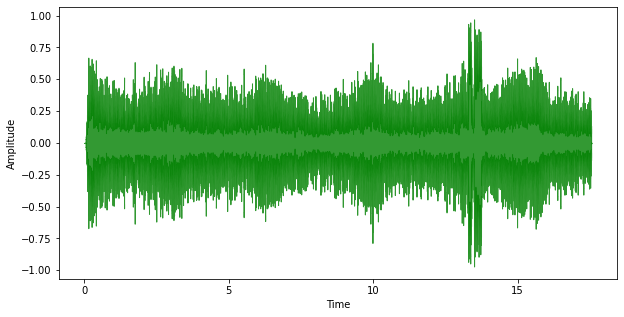

In [53]:
# visualize waveform in time domain

plt.figure(figsize=(10, 5))
librosa.display.waveshow(y=audio_data, sr=sr, color='g', alpha=0.8);
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show();

In [54]:
np.max(audio_data), np.mean(audio_data)

(0.97001815, 0.00015313132)

# Moving to Frequency domain (FFT)

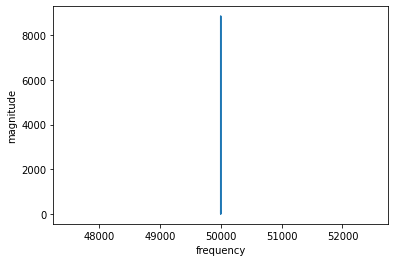

In [55]:
fft = np.fft.fft(audio_data)
# to check the contribution of freq on the overall sound and 
magnitude = np.abs(fft)
#  map it to relative frequency
frequency = np.linspace(sr, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()

# Freq contributing to overall sound - Spectorgram

In [62]:
n_fft = 2048
hop_length = 512

Text(0, 0.5, 'frequency')

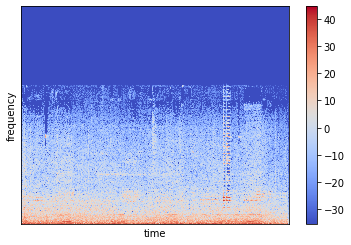

In [60]:
stft = librosa.core.stft(audio_data, n_fft=n_fft, hop_length=52)

# move to magnitude from complex numbers
spectrogram = np.abs(stft)

# convert to log
log = librosa.amplitude_to_db(spectrogram)

# to visualize the spectrogram
librosa.display.specshow(log, sr=sr, hop_length=52)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("frequency")
plt.show()

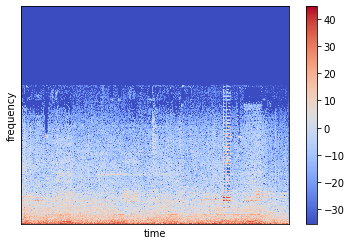

In [61]:
stft = librosa.core.stft(audio_data, n_fft=2048, hop_length=512)

# move to magnitude from complex numbers
spectrogram = np.abs(stft)

# convert to log
log = librosa.amplitude_to_db(spectrogram)

# to visualize the spectrogram
librosa.display.specshow(log, sr=sr, hop_length=512)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("frequency")

plt.show()

# MFCC Calculations

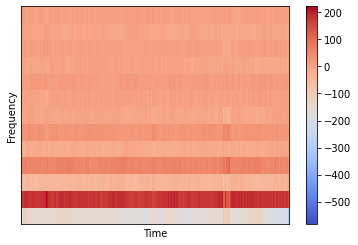

In [64]:
mfcc = librosa.feature.mfcc(audio_data, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# Mel Spectrogram

In [65]:
librosa.feature.melspectrogram(audio_data, sr=sr)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1247049e+01,
        1.2566198e+01, 7.8966987e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.6852787e+01,
        2.1877407e+01, 6.3643736e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2597614e+01,
        3.7611874e+01, 1.4315145e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7192987e-10,
        1.2097122e-10, 3.9870430e-11],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.5760769e-13,
        1.6350341e-12, 6.7836215e-13],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3471642e-14,
        8.5332251e-15, 7.3903233e-16]], dtype=float32)

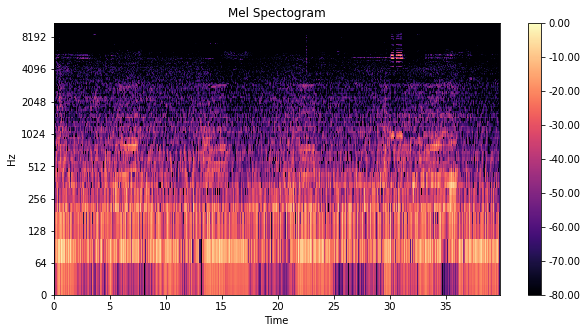

In [72]:
# mel spectogram
mel = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128*2)
db_mel = librosa.amplitude_to_db(mel, ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title("Mel Spectogram")

fig.colorbar(img, ax=ax, format=f'%0.2f');
plt.show()

# Spectrogram

In [67]:
d = librosa.stft(audio_data)

In [68]:
amp = librosa.amplitude_to_db(np.abs(d), ref=np.max)

In [69]:
amp.shape

(1025, 1715)

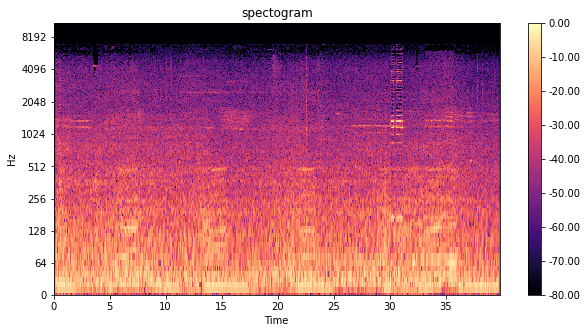

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(amp,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title("spectogram")

fig.colorbar(img, ax=ax, format=f'%0.2f');


# Next